# 03. XGBoost

This notebook trains an XGBoost model. It calculates key metrics and feature importance.

In [1]:
# Imports
import pandas as pd
import numpy as np
import pickle
import json
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, 
    precision_recall_curve, auc, brier_score_loss,
    confusion_matrix, classification_report
)

# Settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Load Processed Data

In [2]:
# Load data
with open('../data/processed/churn_data.pkl', 'rb') as f:
    data = pickle.load(f)

# XGBoost can handle unscaled data better, but using scaled for consistency
X_train = data['X_train_scaled'] 
y_train = data['y_train']
X_test = data['X_test_scaled']
y_test = data['y_test']
feature_names = data['feature_names']

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 265
Test samples: 83


## 2. Model Training

In [3]:
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = (xgb_pred_proba >= 0.5).astype(int)

print(" Model trained")

Training XGBoost...
 Model trained


/Users/linoospaulinos/miniforge3/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [15:13:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 3. Evaluation

In [4]:
# Metrics
accuracy = accuracy_score(y_test, xgb_pred)
roc_auc = roc_auc_score(y_test, xgb_pred_proba)

precision, recall, _ = precision_recall_curve(y_test, xgb_pred_proba)
pr_auc = auc(recall, precision)

brier = brier_score_loss(y_test, xgb_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print(f"Brier Score: {brier:.4f}")

Accuracy: 0.5904
ROC-AUC: 0.6200
PR-AUC: 0.7602
Brier Score: 0.2644


✅ Saved feature importance plot


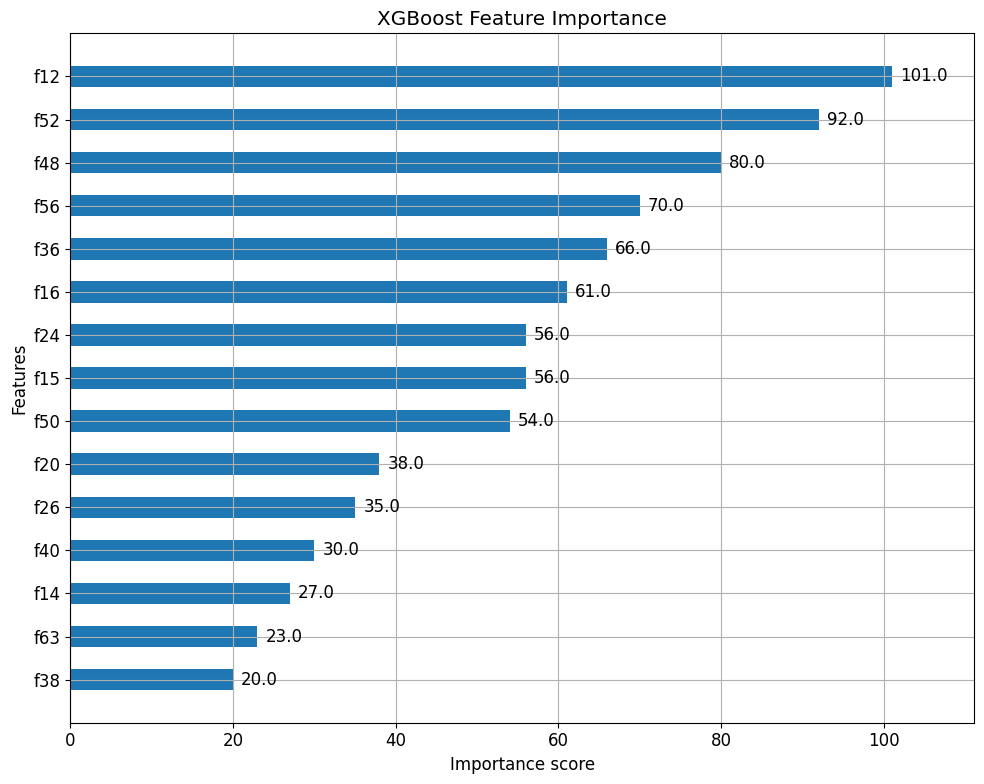

In [5]:
# Feature Importance
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance")

plt.tight_layout()
plt.savefig('../results/figures/xgboost/xgb_feature_importance.png')
print('✅ Saved feature importance plot')
plt.show()

## 4. Save Results

In [6]:
# Save Model
with open('../results/models/xgboost/xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print(" Model saved to ../results/models/xgboost/xgboost.pkl")

# Save Metrics
metrics = {
    'model': 'XGBoost',
    'accuracy': accuracy,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc,
    'brier': brier
}

with open('../results/metrics/xgboost/xgboost.json', 'w') as f:
    json.dump(metrics, f, indent=4)
print(" Metrics saved to ../results/metrics/xgboost/xgboost.json")

 Model saved to ../results/models/xgboost/xgboost.pkl
 Metrics saved to ../results/metrics/xgboost/xgboost.json
